## Imports

In [1]:
import pandas as pd
import tensorflow.keras as keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

2022-08-05 13:57:17.005335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 13:57:17.005377: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
%matplotlib inline
plt.rc('font', size=16)
mpl.rcParams['figure.facecolor'] = 'white'

In [3]:
def plot_results(epochs, history, metric='mean_absolute_error'):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history['loss'], label='train_loss')
    sns.lineplot(x=range(epochs), y=history.history['val_loss'], label='val_loss')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(epochs), y=history.history[metric], label=f'Train {metric}')
    sns.lineplot(x=range(epochs), y=history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.show()

## Daten einlesen

In [4]:
sales_all = pd.read_csv("../Datasets/sales_all.csv")

In [5]:
sales_all

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False,107.0
1919,2017-04-03,0,Mon,False,False,113.0
1920,2017-04-04,1,Tue,False,False,87.0
1921,2017-04-05,2,Wed,False,False,69.0


## Plot

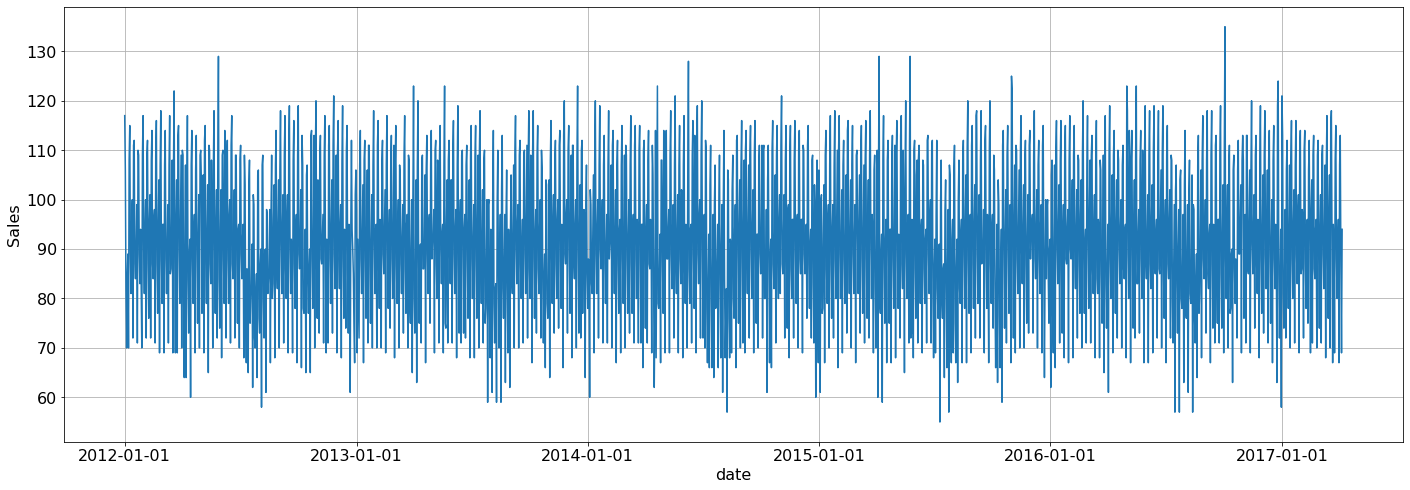

In [6]:
x_ticks = ['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']
plt.figure(figsize=(24, 8))
sns.lineplot(data=sales_all, x="date", y="Sales")
plt.xticks(x_ticks)
plt.grid(True)
plt.show()

Wandeln Sie die Boolschen Features SchoolHoliday und Holiday in numerische Features um. Tipp: Benutzen Sie den LabelEncoder aus dem Vorschau Notebook dafür.

In [7]:
label_encoder_holiday = LabelEncoder()
label_encoder_school = LabelEncoder()
sales_all.iloc[:,3] = label_encoder_holiday.fit_transform(sales_all.loc[:, 'HolidayFlag'])
sales_all.iloc[:,4] = label_encoder_school.fit_transform(sales_all.loc[:, 'SchoolHolidayFlag'])

In [8]:
sales_all

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,1,1,117.0
1,2012-01-02,0,Mon,0,1,106.0
2,2012-01-03,1,Tue,0,1,82.0
3,2012-01-04,2,Wed,0,1,70.0
4,2012-01-05,3,Thur,0,1,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,0,0,107.0
1919,2017-04-03,0,Mon,0,0,113.0
1920,2017-04-04,1,Tue,0,0,87.0
1921,2017-04-05,2,Wed,0,0,69.0


Wandeln Sie die kategorischen Features in numerische Features um, mithilfe von One-Hot-Encoding und weißen Sie Features der Variable X und target der Variable y zu. Tipp: pd.get_dummies()

In [9]:
X = pd.get_dummies(sales_all.loc[:, 'WeekdayNo': 'SchoolHolidayFlag'])
y = sales_all.Sales

In [10]:
X.head()

,WeekdayNo,HolidayFlag,SchoolHolidayFlag,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed
0,6,1,1,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,0,1
4,3,0,1,0,0,0,0,1,0,0


In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Bilden Sie nun ein Sequentielles Modell mit 1 Input-Layer, 2 Hidden-Layern und 1 Output-Layer.

In [12]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation='linear')
])

2022-08-05 13:57:25.363799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-05 13:57:25.368602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 13:57:25.368690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-05 13:57:25.368745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-05 13:57:25.368816: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [13]:
LR = 5e-4
BATCHSIZE = 32
EPOCHS = 30

In [14]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=LR), ##SGD = Stochastic Gradient Descent
    loss=keras.losses.MeanSquaredError(), ## Wird als Metrik für das Netzwerk verwendet um Error zu berechnen
    metrics=keras.losses.MeanAbsoluteError(), ## Nur für Monitoring, intern wird nichts mit diesem Wert gemacht
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x=X_train, y=y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/30
39/39 [==============================] - 1s 6ms/step - loss: 3456.2837 - mean_absolute_error: 50.2539 - val_loss: 769.7264 - val_mean_absolute_error: 25.1588
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 1019.7706 - mean_absolute_error: 26.0650 - val_loss: 162.6104 - val_mean_absolute_error: 11.3651
Epoch 3/30
39/39 [==============================] - 0s 3ms/step - loss: 735.5803 - mean_absolute_error: 23.9454 - val_loss: 737.0442 - val_mean_absolute_error: 25.3061
Epoch 4/30
39/39 [==============================] - 0s 3ms/step - loss: 722.9671 - mean_absolute_error: 22.8871 - val_loss: 541.4879 - val_mean_absolute_error: 21.1169
Epoch 5/30
39/39 [==============================] - 0s 2ms/step - loss: 586.1379 - mean_absolute_error: 20.9681 - val_loss: 53.8898 - val_mean_absolute_error: 6.1102
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 424.1563 - mean_absolute_error: 17.5419 - val_loss: 869.7618 - val_mean_absolute_error: 

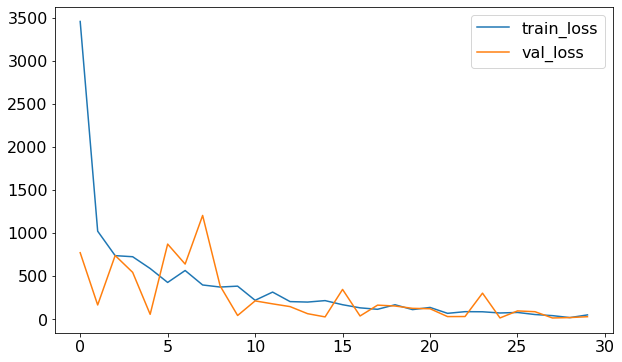

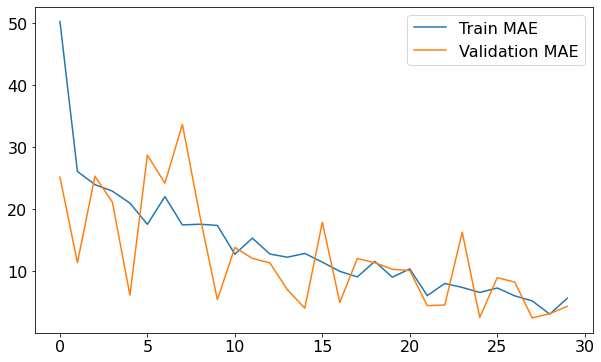

In [17]:
plot_results(EPOCHS, history)

Schauen Sie sich die Evaluierung Ihrer Testdaten an und geben Sie eine kurze Beurteilung ab

In [19]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 1ms/step - loss: 27.4218 - mean_absolute_error: 4.1661


[27.421823501586914, 4.166130542755127]